In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Opportunity Atlas Data**
#### The data attempts to answer the question of, "which neighborhoods in America offer children the best chance to rise out of poverty?". They collect data from 20 million anonymous individuals from childhood into their mid-30s. The two dataset's I have downloaded, income and hs_grad_rate, were subsets of this entire data set.
1. The income file is a data frame that contains info on the city code, name of the county it is, and income.
2. The hs_grad_rate data set has the same data, except income is replaced with the high school graduation rate of that region.

In [2]:
# Load in data
grad_rate = pd.read_csv("hs_grad_rate.csv")
income = pd.read_csv("income.csv")

# **Data Cleaning and EDA**
#### Although seen as a lack luster part of any data job, cleaning is perhaps **THE** most important step. Without it, you will not be able to make accurate models, create effective visualizations, or generate any meaningful insights. Making sure the data is properly prepared before doing any analysis is essential.

# **Question 1a:**
#### Rename the longer Columns to make it more clear and easier to use later on. If you are not familiar with how to do this, here is some [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) on how to get started! You should get used to looking at documentation when stuck. Not only will it help get you unstuck, but you will most likely need to do this on the job.

In [3]:
income = income.rename(columns={"Household_Income_at_Age_35_rP_gP_pall": "Income"})
income

,cty,Name,Income
0,cty38033,"Golden Valley County, ND",71954.0
1,cty38007,"Billings County, ND",70706.0
2,cty38065,"Oliver County, ND",70244.0
3,cty38011,"Bowman County, ND",70037.0
4,cty38057,"Mercer County, ND",69633.0
...,...,...,...
3215,cty48301,"Loving County, TX",NaN
3216,cty31005,"Arthur County, NE",NaN
3217,cty72067,"Hormigueros Municipio, PR",NaN
3218,cty72049,"Culebra Municipio, PR",NaN


# **Question 1b:**
#### Some simple statistics can be found using the [describe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method. Use this on the income data frame to get some insights on the data set and to see if it matches the original data on the website.

In [4]:
income.describe()

,Income
count,3208.000000
mean,43662.600374
std,8865.886119
min,11316.000000
25%,37733.750000
50%,43327.000000
75%,49686.000000
max,71954.000000


#### As you see, the median income is the same that is listed on the original data fro  the site. This is good and exploring the data to ensure simple things like this can be very important validation.

In [5]:
# Rename just the same as in port a
grad_rate = grad_rate.rename(columns={"High_School_Graduation_Rate_rP_gP_pall": "High_School_Grad_Rate"})
grad_rate

,cty,Name,High_School_Grad_Rate
0,cty31113,"Logan County, NE",0.9952
1,cty30055,"McCone County, MT",0.9913
2,cty30075,"Powder River County, MT",0.9904
3,cty02275,"Wrangell City and Borough, AK",0.9899
4,cty06051,"Mono County, CA",0.9878
...,...,...,...
3215,cty48345,"Motley County, TX",NaN
3216,cty30011,"Carter County, MT",NaN
3217,cty72047,"Corozal Municipio, PR",NaN
3218,cty48105,"Crockett County, TX",NaN


# **Question 1b**
#### Merge the two data frames so that we can get income and grad rates in the same table. (hint: you'll want to merge based on similar data found in both). If you get stuck or are not familiar with pandas, you can take a look at the official docs [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [6]:
merged = income.merge(grad_rate, on="Name")
merged

,cty_x,Name,Income,cty_y,High_School_Grad_Rate
0,cty38033,"Golden Valley County, ND",71954.0,cty38033,0.9651
1,cty38007,"Billings County, ND",70706.0,cty38007,0.9274
2,cty38065,"Oliver County, ND",70244.0,cty38065,0.8194
3,cty38011,"Bowman County, ND",70037.0,cty38011,0.8683
4,cty38057,"Mercer County, ND",69633.0,cty38057,0.8871
...,...,...,...,...,...
3215,cty48301,"Loving County, TX",NaN,cty48301,NaN
3216,cty31005,"Arthur County, NE",NaN,cty31005,NaN
3217,cty72067,"Hormigueros Municipio, PR",NaN,cty72067,NaN
3218,cty72049,"Culebra Municipio, PR",NaN,cty72049,NaN


# **Regex**
#### Regex, or regular expressions, can be very useful for finding bits of information in large datasets. A common real world application is when websites verify email and passwords. Ensuring every email has an @ symbol or passwords contain at least one number is using the power of Regex! A good website to play around with regex and understand how to use them is [regex101](https://regex101.com/). Once you get a feel for this, you can move onto the next question.

# **Question 2a:**
#### Using what you just learned about regex, extract the state in the Name column and put it into the data frame as a new column called State.

In [7]:
merged['State'] = merged['Name'].str.extract(r'([A-Z]{2})')
merged

,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
0,cty38033,"Golden Valley County, ND",71954.0,cty38033,0.9651,ND
1,cty38007,"Billings County, ND",70706.0,cty38007,0.9274,ND
2,cty38065,"Oliver County, ND",70244.0,cty38065,0.8194,ND
3,cty38011,"Bowman County, ND",70037.0,cty38011,0.8683,ND
4,cty38057,"Mercer County, ND",69633.0,cty38057,0.8871,ND
...,...,...,...,...,...,...
3215,cty48301,"Loving County, TX",NaN,cty48301,NaN,TX
3216,cty31005,"Arthur County, NE",NaN,cty31005,NaN,NE
3217,cty72067,"Hormigueros Municipio, PR",NaN,cty72067,NaN,PR
3218,cty72049,"Culebra Municipio, PR",NaN,cty72049,NaN,PR


#### If you played around with regex101 and still do not quite understand this code, here is a quick explanation:
- [A-Z] is simply saying that the group of characters you want to find have to be capital letters from A-Z
- The {2} that comes after it more clearly defines how many consecutive A-Z characters you seek to find in the string. In this case, we want to look for 2 consecutive capital letters in the Name column because all states use a two letter capital letter abbreviation 

#### There are other ways of accomplishing the same goal, so do not worry if it mirrors my code. As long as your newly created State column contains the state abbreviations you are golden!

# **Question 2b:**
#### Now that you are more familiar with, we will combine it with a new technique, [querying](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html). If you are familiar with querying languages such as SQL, this is similar. Query the data into a new df based on the new State column you created so that only counties in California are included.

In [8]:
ca_only = merged.query('Name.str.contains("CA")', engine='python')
ca_only

,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
260,cty06041,"Marin County, CA",56418.0,cty06041,0.9350,CA
399,cty06081,"San Mateo County, CA",54257.0,cty06081,0.9058,CA
525,cty06085,"Santa Clara County, CA",52512.0,cty06085,0.8960,CA
657,cty06061,"Placer County, CA",51087.0,cty06061,0.9134,CA
664,cty06013,"Contra Costa County, CA",51006.0,cty06013,0.9020,CA
702,cty06017,"El Dorado County, CA",50689.0,cty06017,0.9226,CA
760,cty06075,"San Francisco County, CA",50140.0,cty06075,0.9091,CA
960,cty06097,"Sonoma County, CA",48258.0,cty06097,0.8877,CA
966,cty06001,"Alameda County, CA",48159.0,cty06001,0.8851,CA
980,cty06059,"Orange County, CA",48034.0,cty06059,0.8869,CA


# **More EDA and Cleaning**
#### We will now work more on using the query, [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html), and [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) methods. 
- The groupby clause allows for groupings of certain metrics. One easy example is in election data. Say you have many candidates running for office. Candidates have different political affiliations. You can group by what party they associate with, say Republican, Democrat, and Independent. 
- Dropping columns that are redundant or contain no useful information are also important to look into as keeping certain data can negatively impact all of your future analysis and findings.

# **Question 3a:**
#### Use the query and groupby methods to query the counties that have income levels that equal to or higher than the median. You should then groupby the State, the column you created in part 2a.

In [9]:
for i, j in merged.query("Income >= 43327").groupby("State"):
  print(f"Name: {i}")
  display(j)

Name: AK


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
219,cty02230,"Skagway Municipality, AK",57181.0,cty02230,NaN,AK
839,cty02068,"Denali Borough, AK",49370.0,cty02068,0.9821,AK
1472,cty02100,"Haines Borough, AK",44281.0,cty02100,NaN,AK


Name: AL


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
625,cty01117,"Shelby County, AL",51487.0,cty01117,0.8894,AL


Name: AR


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1549,cty05053,"Grant County, AR",43740.0,cty05053,0.8960,AR
1561,cty05007,"Benton County, AR",43646.0,cty05007,0.8430,AR
1579,cty05045,"Faulkner County, AR",43485.0,cty05045,0.9021,AR


Name: AZ


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1014,cty04011,"Greenlee County, AZ",47710.0,cty04011,0.8468,AZ


Name: CA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
260,cty06041,"Marin County, CA",56418.0,cty06041,0.9350,CA
399,cty06081,"San Mateo County, CA",54257.0,cty06081,0.9058,CA
525,cty06085,"Santa Clara County, CA",52512.0,cty06085,0.8960,CA
657,cty06061,"Placer County, CA",51087.0,cty06061,0.9134,CA
664,cty06013,"Contra Costa County, CA",51006.0,cty06013,0.9020,CA
702,cty06017,"El Dorado County, CA",50689.0,cty06017,0.9226,CA
760,cty06075,"San Francisco County, CA",50140.0,cty06075,0.9091,CA
960,cty06097,"Sonoma County, CA",48258.0,cty06097,0.8877,CA
966,cty06001,"Alameda County, CA",48159.0,cty06001,0.8851,CA
980,cty06059,"Orange County, CA",48034.0,cty06059,0.8869,CA


Name: CO


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
132,cty08103,"Rio Blanco County, CO",59126.0,cty08103,0.8700,CO
177,cty08035,"Douglas County, CO",58011.0,cty08035,0.9251,CO
324,cty08107,"Routt County, CO",55361.0,cty08107,0.9487,CO
341,cty08113,"San Miguel County, CO",55156.0,cty08113,0.8805,CO
406,cty08125,"Yuma County, CO",54035.0,cty08125,0.8661,CO
446,cty08014,"Broomfield County, CO",53438.0,cty08014,0.8968,CO
453,cty08117,"Summit County, CO",53307.0,cty08117,0.9748,CO
460,cty08019,"Clear Creek County, CO",53084.0,cty08019,0.8208,CO
480,cty08057,"Jackson County, CO",52870.0,cty08057,NaN,CO
492,cty08017,"Cheyenne County, CO",52803.0,cty08017,0.8605,CO


Name: CT


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
227,cty09013,"Tolland County, CT",57024.0,cty09013,0.9243,CT
305,cty09001,"Fairfield County, CT",55614.0,cty09001,0.9220,CT
358,cty09007,"Middlesex County, CT",54837.0,cty09007,0.9205,CT
436,cty09005,"Litchfield County, CT",53636.0,cty09005,0.9314,CT
604,cty09003,"Hartford County, CT",51681.0,cty09003,0.9058,CT
732,cty09009,"New Haven County, CT",50468.0,cty09009,0.9078,CT
963,cty09011,"New London County, CT",48244.0,cty09011,0.9022,CT
1363,cty09015,"Windham County, CT",45141.0,cty09015,0.8792,CT


Name: DE


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1390,cty10003,"New Castle County, DE",44982.0,cty10003,0.8776,DE


Name: FL


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1382,cty12109,"St. Johns County, FL",45057.0,cty12109,0.8851,FL
1439,cty12117,"Seminole County, FL",44586.0,cty12117,0.8782,FL
1465,cty12085,"Martin County, FL",44369.0,cty12085,0.8761,FL


Name: GA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
393,cty13113,"Fayette County, GA",54333.0,cty13113,0.9202,GA
800,cty13117,"Forsyth County, GA",49689.0,cty13117,0.8617,GA
813,cty13219,"Oconee County, GA",49569.0,cty13219,0.8965,GA
925,cty13073,"Columbia County, GA",48550.0,cty13073,0.8753,GA
930,cty13067,"Cobb County, GA",48526.0,cty13067,0.8930,GA
1088,cty13135,"Gwinnett County, GA",47147.0,cty13135,0.8875,GA
1226,cty13057,"Cherokee County, GA",46081.0,cty13057,0.8713,GA
1567,cty13177,"Lee County, GA",43618.0,cty13177,0.8802,GA
1577,cty13029,"Bryan County, GA",43487.0,cty13029,0.8644,GA


Name: HI


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1031,cty15003,"Honolulu County, HI",47594.0,cty15003,0.9319,HI
1520,cty15007,"Kauai County, HI",43969.0,cty15007,0.8915,HI
1572,cty15009,"Maui County, HI",43536.0,cty15009,0.9230,HI


Name: IA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
21,cty19167,"Sioux County, IA",65084.0,cty19167,0.9080,IA
23,cty19027,"Carroll County, IA",64918.0,cty19027,0.8989,IA
32,cty19109,"Kossuth County, IA",63485.0,cty19109,0.8989,IA
39,cty19119,"Lyon County, IA",62860.0,cty19119,0.9227,IA
47,cty19037,"Chickasaw County, IA",62330.0,cty19037,0.9216,IA
...,...,...,...,...,...,...
1095,cty19101,"Jefferson County, IA",47052.0,cty19101,0.9019,IA
1146,cty19007,"Appanoose County, IA",46603.0,cty19007,0.8702,IA
1168,cty19053,"Decatur County, IA",46463.0,cty19053,0.8750,IA
1175,cty19179,"Wapello County, IA",46409.0,cty19179,0.8911,IA


Name: ID


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
381,cty16037,"Custer County, ID",54463.0,cty16037,0.8452,ID
396,cty16065,"Madison County, ID",54289.0,cty16065,0.9300,ID
410,cty16007,"Bear Lake County, ID",53962.0,cty16007,0.8999,ID
519,cty16029,"Caribou County, ID",52575.0,cty16029,0.8979,ID
528,cty16041,"Franklin County, ID",52472.0,cty16041,0.9214,ID
550,cty16071,"Oneida County, ID",52279.0,cty16071,0.9321,ID
655,cty16057,"Latah County, ID",51097.0,cty16057,0.9259,ID
740,cty16081,"Teton County, ID",50325.0,cty16081,0.8947,ID
759,cty16051,"Jefferson County, ID",50152.0,cty16051,0.8757,ID
870,cty16049,"Idaho County, ID",49035.0,cty16049,0.8645,ID


Name: IL


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
86,cty17043,"DuPage County, IL",60625.0,cty17043,0.9335,IL
164,cty17133,"Monroe County, IL",58280.0,cty17133,0.9402,IL
187,cty17013,"Calhoun County, IL",57872.0,cty17013,0.8944,IL
202,cty17027,"Clinton County, IL",57659.0,cty17027,0.9243,IL
208,cty17203,"Woodford County, IL",57527.0,cty17203,0.9118,IL
...,...,...,...,...,...,...
1491,cty17165,"Saline County, IL",44149.0,cty17165,0.8640,IL
1527,cty17069,"Hardin County, IL",43931.0,cty17069,0.9438,IL
1529,cty17115,"Macon County, IL",43927.0,cty17115,0.8795,IL
1583,cty17087,"Johnson County, IL",43465.0,cty17087,0.8832,IL


Name: IN


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
83,cty18037,"Dubois County, IN",60835.0,cty18037,0.8745,IN
160,cty18057,"Hamilton County, IN",58468.0,cty18057,0.9238,IN
464,cty18007,"Benton County, IN",53040.0,cty18007,0.8836,IN
472,cty18063,"Hendricks County, IN",52942.0,cty18063,0.9227,IN
487,cty18147,"Spencer County, IN",52825.0,cty18147,0.9057,IN
...,...,...,...,...,...,...
1536,cty18017,"Cass County, IN",43868.0,cty18017,0.8713,IN
1538,cty18105,"Monroe County, IN",43835.0,cty18105,0.8685,IN
1545,cty18023,"Clinton County, IN",43777.0,cty18023,0.8574,IN
1566,cty18089,"Lake County, IN",43627.0,cty18089,0.8653,IN


Name: KS


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
13,cty20131,"Nemaha County, KS",67080.0,cty20131,0.9185,KS
35,cty20063,"Gove County, KS",63420.0,cty20063,0.9097,KS
55,cty20083,"Hodgeman County, KS",62065.0,cty20083,0.9634,KS
62,cty20071,"Greeley County, KS",61669.0,cty20071,0.9096,KS
79,cty20199,"Wallace County, KS",60990.0,cty20199,0.8299,KS
...,...,...,...,...,...,...
1502,cty20093,"Kearny County, KS",44053.0,cty20093,0.7552,KS
1522,cty20107,"Linn County, KS",43960.0,cty20107,0.8758,KS
1554,cty20173,"Sedgwick County, KS",43699.0,cty20173,0.8647,KS
1556,cty20055,"Finney County, KS",43669.0,cty20055,0.8085,KS


Name: KY


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
401,cty21185,"Oldham County, KY",54118.0,cty21185,0.9203,KY
848,cty21091,"Hancock County, KY",49239.0,cty21091,0.9206,KY
896,cty21015,"Boone County, KY",48765.0,cty21015,0.8866,KY
957,cty21037,"Campbell County, KY",48283.0,cty21037,0.8854,KY
1118,cty21039,"Carlisle County, KY",46791.0,cty21039,0.8775,KY
1184,cty21059,"Daviess County, KY",46340.0,cty21059,0.9092,KY
1198,cty21225,"Union County, KY",46279.0,cty21225,0.8739,KY
1232,cty21117,"Kenton County, KY",46040.0,cty21117,0.8841,KY
1297,cty21233,"Webster County, KY",45636.0,cty21233,0.8593,KY
1357,cty21149,"McLean County, KY",45168.0,cty21149,0.8720,KY


Name: LA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
612,cty22023,"Cameron Parish, LA",51570.0,cty22023,0.8398,LA
718,cty22089,"St. Charles Parish, LA",50585.0,cty22089,0.8993,LA
773,cty22093,"St. James Parish, LA",49962.0,cty22093,0.8660,LA
883,cty22059,"LaSalle Parish, LA",48895.0,cty22059,0.8329,LA
884,cty22057,"Lafourche Parish, LA",48877.0,cty22057,0.8465,LA
975,cty22005,"Ascension Parish, LA",48062.0,cty22005,0.8567,LA
1111,cty22007,"Assumption Parish, LA",46917.0,cty22007,0.7589,LA
1141,cty22103,"St. Tammany Parish, LA",46638.0,cty22103,0.8539,LA
1286,cty22113,"Vermilion Parish, LA",45699.0,cty22113,0.7964,LA
1300,cty22085,"Sabine Parish, LA",45613.0,cty22085,0.7956,LA


Name: MA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
53,cty25021,"Norfolk County, MA",62165.0,cty25021,0.9330,MA
134,cty25017,"Middlesex County, MA",59100.0,cty25017,0.9267,MA
273,cty25019,"Nantucket County, MA",56014.0,cty25019,0.9205,MA
356,cty25023,"Plymouth County, MA",54845.0,cty25023,0.9132,MA
448,cty25009,"Essex County, MA",53426.0,cty25009,0.9042,MA
499,cty25027,"Worcester County, MA",52733.0,cty25027,0.9096,MA
623,cty25015,"Hampshire County, MA",51513.0,cty25015,0.9105,MA
707,cty25005,"Bristol County, MA",50636.0,cty25005,0.8960,MA
805,cty25001,"Barnstable County, MA",49643.0,cty25001,0.9105,MA
890,cty25007,"Dukes County, MA",48827.0,cty25007,0.8736,MA


Name: MD


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
85,cty24027,"Howard County, MD",60740.0,cty24027,0.9492,MD
209,cty24031,"Montgomery County, MD",57519.0,cty24031,0.9245,MD
290,cty24013,"Carroll County, MD",55721.0,cty24013,0.9307,MD
441,cty24021,"Frederick County, MD",53498.0,cty24021,0.9264,MD
521,cty24009,"Calvert County, MD",52553.0,cty24009,0.9140,MD
603,cty24025,"Harford County, MD",51685.0,cty24025,0.9214,MD
668,cty24003,"Anne Arundel County, MD",50988.0,cty24003,0.9056,MD
722,cty24037,"St. Mary's County, MD",50546.0,cty24037,0.8879,MD
747,cty24035,"Queen Anne's County, MD",50252.0,cty24035,0.9123,MD
864,cty24017,"Charles County, MD",49104.0,cty24017,0.9151,MD


Name: ME


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
941,cty23005,"Cumberland County, ME",48441.0,cty23005,0.8987,ME
1066,cty23031,"York County, ME",47312.0,cty23031,0.9000,ME
1490,cty23011,"Kennebec County, ME",44150.0,cty23011,0.8862,ME
1550,cty23001,"Androscoggin County, ME",43739.0,cty23001,0.8901,ME
1555,cty23007,"Franklin County, ME",43671.0,cty23007,0.9044,ME
1557,cty23019,"Penobscot County, ME",43665.0,cty23019,0.8783,ME


Name: MI


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
465,cty26139,"Ottawa County, MI",53031.0,cty26139,0.9004,MI
493,cty26037,"Clinton County, MI",52788.0,cty26037,0.8900,MI
542,cty26093,"Livingston County, MI",52353.0,cty26093,0.9057,MI
587,cty26125,"Oakland County, MI",51894.0,cty26125,0.9087,MI
641,cty26061,"Houghton County, MI",51333.0,cty26061,0.8912,MI
696,cty26063,"Huron County, MI",50726.0,cty26063,0.9088,MI
771,cty26099,"Macomb County, MI",50022.0,cty26099,0.8942,MI
785,cty26111,"Midland County, MI",49868.0,cty26111,0.8950,MI
831,cty26043,"Dickinson County, MI",49413.0,cty26043,0.8760,MI
846,cty26161,"Washtenaw County, MI",49262.0,cty26161,0.9205,MI


Name: MN


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
29,cty27149,"Stevens County, MN",63874.0,cty27149,0.9375,MN
46,cty27081,"Lincoln County, MN",62453.0,cty27081,0.8940,MN
54,cty27019,"Carver County, MN",62102.0,cty27019,0.9135,MN
66,cty27125,"Red Lake County, MN",61550.0,cty27125,0.9155,MN
73,cty27011,"Big Stone County, MN",61256.0,cty27011,0.8734,MN
...,...,...,...,...,...,...
937,cty27007,"Beltrami County, MN",48450.0,cty27007,0.8769,MN
1023,cty27057,"Hubbard County, MN",47667.0,cty27057,0.8608,MN
1094,cty27031,"Cook County, MN",47078.0,cty27031,0.8974,MN
1211,cty27087,"Mahnomen County, MN",46133.0,cty27087,0.9147,MN


Name: MO


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
407,cty29183,"St. Charles County, MO",54016.0,cty29183,0.9062,MO
412,cty29147,"Nodaway County, MO",53950.0,cty29147,0.8789,MO
449,cty29165,"Platte County, MO",53376.0,cty29165,0.8954,MO
483,cty29151,"Osage County, MO",52854.0,cty29151,0.8965,MO
523,cty29186,"Ste. Genevieve County, MO",52525.0,cty29186,0.8594,MO
526,cty29075,"Gentry County, MO",52506.0,cty29075,0.8359,MO
698,cty29157,"Perry County, MO",50718.0,cty29157,0.8842,MO
767,cty29041,"Chariton County, MO",50058.0,cty29041,0.9116,MO
777,cty29051,"Cole County, MO",49939.0,cty29051,0.8990,MO
797,cty29005,"Atchison County, MO",49696.0,cty29005,0.8524,MO


Name: MS


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1416,cty28073,"Lamar County, MS",44792.0,cty28073,0.8514,MS


Name: MT


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
64,cty30019,"Daniels County, MT",61602.0,cty30019,NaN,MT
89,cty30109,"Wibaux County, MT",60562.0,cty30109,NaN,MT
95,cty30083,"Richland County, MT",60247.0,cty30083,0.9167,MT
141,cty30021,"Dawson County, MT",58902.0,cty30021,0.8786,MT
161,cty30025,"Fallon County, MT",58454.0,cty30025,0.8755,MT
275,cty30043,"Jefferson County, MT",56007.0,cty30043,0.8404,MT
312,cty30075,"Powder River County, MT",55501.0,cty30075,0.9904,MT
337,cty30091,"Sheridan County, MT",55194.0,cty30091,0.8701,MT
353,cty30011,"Carter County, MT",54917.0,cty30011,NaN,MT
359,cty30095,"Stillwater County, MT",54823.0,cty30095,0.8913,MT


Name: NC


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
929,cty37183,"Wake County, NC",48527.0,cty37183,0.8838,NC
1028,cty37135,"Orange County, NC",47620.0,cty37135,0.9043,NC
1456,cty37059,"Davie County, NC",44450.0,cty37059,0.8808,NC
1506,cty37189,"Watauga County, NC",44033.0,cty37189,0.8800,NC


Name: ND


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
0,cty38033,"Golden Valley County, ND",71954.0,cty38033,0.9651,ND
1,cty38007,"Billings County, ND",70706.0,cty38007,0.9274,ND
2,cty38065,"Oliver County, ND",70244.0,cty38065,0.8194,ND
3,cty38011,"Bowman County, ND",70037.0,cty38011,0.8683,ND
4,cty38057,"Mercer County, ND",69633.0,cty38057,0.8871,ND
6,cty38025,"Dunn County, ND",68842.0,cty38025,0.9250,ND
7,cty38013,"Burke County, ND",68786.0,cty38013,0.8755,ND
8,cty38045,"LaMoure County, ND",68326.0,cty38045,0.8867,ND
9,cty38089,"Stark County, ND",68034.0,cty38089,0.9060,ND
10,cty38001,"Adams County, ND",67766.0,cty38001,0.8643,ND


Name: NE


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
15,cty31027,"Cedar County, NE",66101.0,cty31027,0.9089,NE
26,cty31039,"Cuming County, NE",64498.0,cty31039,0.8921,NE
27,cty31011,"Boone County, NE",64246.0,cty31011,0.8831,NE
56,cty31009,"Blaine County, NE",62020.0,cty31009,NaN,NE
57,cty31115,"Loup County, NE",61997.0,cty31115,0.7947,NE
...,...,...,...,...,...,...
1191,cty31047,"Dawson County, NE",46314.0,cty31047,0.8664,NE
1209,cty31043,"Dakota County, NE",46149.0,cty31043,0.8611,NE
1258,cty31113,"Logan County, NE",45868.0,cty31113,0.9952,NE
1264,cty31007,"Banner County, NE",45851.0,cty31007,0.7950,NE


Name: NH


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
433,cty33015,"Rockingham County, NH",53713.0,cty33015,0.8867,NH
473,cty33011,"Hillsborough County, NH",52940.0,cty33011,0.8827,NH
888,cty33013,"Merrimack County, NH",48840.0,cty33013,0.8661,NH
973,cty33009,"Grafton County, NH",48066.0,cty33009,0.8601,NH
993,cty33017,"Strafford County, NH",47927.0,cty33017,0.8736,NH
1076,cty33005,"Cheshire County, NH",47215.0,cty33005,0.8520,NH
1188,cty33007,"Coos County, NH",46316.0,cty33007,0.8641,NH
1244,cty33003,"Carroll County, NH",45969.0,cty33003,0.8466,NH
1288,cty33001,"Belknap County, NH",45683.0,cty33001,0.8538,NH


Name: NJ


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
17,cty34027,"Morris County, NJ",65975.0,cty34027,0.9388,NJ
30,cty34019,"Hunterdon County, NJ",63871.0,cty34019,0.9342,NJ
34,cty34003,"Bergen County, NJ",63424.0,cty34003,0.9408,NJ
71,cty34035,"Somerset County, NJ",61283.0,cty34035,0.9306,NJ
147,cty34025,"Monmouth County, NJ",58745.0,cty34025,0.9317,NJ
170,cty34037,"Sussex County, NJ",58180.0,cty34037,0.9217,NJ
242,cty34023,"Middlesex County, NJ",56756.0,cty34023,0.9287,NJ
476,cty34041,"Warren County, NJ",52901.0,cty34041,0.9090,NJ
599,cty34039,"Union County, NJ",51773.0,cty34039,0.9140,NJ
621,cty34005,"Burlington County, NJ",51524.0,cty34005,0.9145,NJ


Name: NM


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
297,cty35028,"Los Alamos County, NM",55682.0,cty35028,0.9223,NM
334,cty35021,"Harding County, NM",55213.0,cty35021,NaN,NM
699,cty35011,"De Baca County, NM",50717.0,cty35011,0.8970,NM
1234,cty35015,"Eddy County, NM",46030.0,cty35015,0.8188,NM
1457,cty35025,"Lea County, NM",44433.0,cty35025,0.7964,NM


Name: NV


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
573,cty32017,"Lincoln County, NV",52070.0,cty32017,0.8892,NV
723,cty32007,"Elko County, NV",50538.0,cty32007,0.8559,NV
861,cty32015,"Lander County, NV",49126.0,cty32015,0.8445,NV
891,cty32011,"Eureka County, NV",48820.0,cty32011,NaN,NV
909,cty32027,"Pershing County, NV",48671.0,cty32027,0.8541,NV
917,cty32013,"Humboldt County, NV",48595.0,cty32013,0.8710,NV
921,cty32009,"Esmeralda County, NV",48561.0,cty32009,NaN,NV
1083,cty32033,"White Pine County, NV",47197.0,cty32033,0.8619,NV
1116,cty32005,"Douglas County, NV",46814.0,cty32005,0.8788,NV
1587,cty32510,"Carson City, NV",43446.0,cty32510,0.8761,NV


Name: NY


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
37,cty36059,"Nassau County, NY",63237.0,cty36059,0.9441,NY
44,cty36079,"Putnam County, NY",62649.0,cty36079,0.9403,NY
162,cty36087,"Rockland County, NY",58374.0,cty36087,0.9174,NY
224,cty36119,"Westchester County, NY",57101.0,cty36119,0.9217,NY
257,cty36085,"Richmond County, NY",56457.0,cty36085,0.9233,NY
307,cty36103,"Suffolk County, NY",55583.0,cty36103,0.9240,NY
376,cty36001,"Albany County, NY",54559.0,cty36001,0.9223,NY
391,cty36091,"Saratoga County, NY",54344.0,cty36091,0.9113,NY
490,cty36027,"Dutchess County, NY",52811.0,cty36027,0.8976,NY
634,cty36093,"Schenectady County, NY",51419.0,cty36093,0.9175,NY


Name: OH


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
169,cty39137,"Putnam County, OH",58212.0,cty39137,0.8904,OH
171,cty39107,"Mercer County, OH",58164.0,cty39107,0.8945,OH
308,cty39055,"Geauga County, OH",55561.0,cty39055,0.8305,OH
373,cty39041,"Delaware County, OH",54596.0,cty39041,0.9186,OH
452,cty39011,"Auglaize County, OH",53309.0,cty39011,0.9058,OH
617,cty39173,"Wood County, OH",51544.0,cty39173,0.9002,OH
626,cty39103,"Medina County, OH",51474.0,cty39103,0.9074,OH
683,cty39069,"Henry County, OH",50885.0,cty39069,0.8799,OH
700,cty39165,"Warren County, OH",50713.0,cty39165,0.9007,OH
786,cty39085,"Lake County, OH",49853.0,cty39085,0.9020,OH


Name: OK


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
178,cty40053,"Grant County, OK",58003.0,cty40053,0.7876,OK
303,cty40129,"Roger Mills County, OK",55633.0,cty40129,0.8611,OK
331,cty40003,"Alfalfa County, OK",55253.0,cty40003,0.8252,OK
426,cty40093,"Major County, OK",53773.0,cty40093,0.8289,OK
444,cty40073,"Kingfisher County, OK",53440.0,cty40073,0.8671,OK
456,cty40045,"Ellis County, OK",53157.0,cty40045,0.8499,OK
522,cty40043,"Dewey County, OK",52527.0,cty40043,0.8212,OK
552,cty40007,"Beaver County, OK",52269.0,cty40007,0.8824,OK
567,cty40059,"Harper County, OK",52160.0,cty40059,0.8557,OK
706,cty40151,"Woods County, OK",50653.0,cty40151,0.8245,OK


Name: OR


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
462,cty41021,"Gilliam County, OR",53063.0,cty41021,0.8988,OR
563,cty41069,"Wheeler County, OR",52198.0,cty41069,NaN,OR
837,cty41003,"Benton County, OR",49377.0,cty41003,0.9156,OR
904,cty41067,"Washington County, OR",48703.0,cty41067,0.8874,OR
922,cty41005,"Clackamas County, OR",48554.0,cty41005,0.8921,OR
964,cty41023,"Grant County, OR",48190.0,cty41023,0.8600,OR
1071,cty41055,"Sherman County, OR",47244.0,cty41055,0.9855,OR
1109,cty41037,"Lake County, OR",46934.0,cty41037,0.9024,OR
1125,cty41063,"Wallowa County, OR",46730.0,cty41063,0.9056,OR
1155,cty41049,"Morrow County, OR",46539.0,cty41049,0.8195,OR


Name: PA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
129,cty42091,"Montgomery County, PA",59230.0,cty42091,0.9247,PA
138,cty42029,"Chester County, PA",58989.0,cty42029,0.9032,PA
214,cty42017,"Bucks County, PA",57376.0,cty42017,0.9273,PA
435,cty42041,"Cumberland County, PA",53643.0,cty42041,0.8637,PA
438,cty42129,"Westmoreland County, PA",53594.0,cty42129,0.9133,PA
...,...,...,...,...,...,...
1345,cty42123,"Warren County, PA",45261.0,cty42123,0.8733,PA
1404,cty42089,"Monroe County, PA",44875.0,cty42089,0.8830,PA
1497,cty42087,"Mifflin County, PA",44096.0,cty42087,0.8011,PA
1516,cty42023,"Cameron County, PA",43981.0,cty42023,0.8682,PA


Name: RI


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
301,cty44001,"Bristol County, RI",55650.0,cty44001,0.9307,RI
546,cty44009,"Washington County, RI",52321.0,cty44009,0.9124,RI
640,cty44003,"Kent County, RI",51337.0,cty44003,0.9184,RI
738,cty44005,"Newport County, RI",50359.0,cty44005,0.9169,RI
1144,cty44007,"Providence County, RI",46623.0,cty44007,0.8915,RI


Name: SC


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
1588,cty45063,"Lexington County, SC",43428.0,cty45063,0.8834,SC


Name: SD


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
5,cty46063,"Harding County, SD",69224.0,cty46063,0.9316,SD
11,cty46021,"Campbell County, SD",67723.0,cty46021,0.8919,SD
36,cty46059,"Hand County, SD",63246.0,cty46059,0.8568,SD
49,cty46045,"Edmunds County, SD",62300.0,cty46045,0.8632,SD
51,cty46087,"McCook County, SD",62267.0,cty46087,0.9047,SD
52,cty46043,"Douglas County, SD",62220.0,cty46043,0.9062,SD
58,cty46097,"Miner County, SD",61979.0,cty46097,0.9358,SD
67,cty46119,"Sully County, SD",61456.0,cty46119,0.8191,SD
82,cty46061,"Hanson County, SD",60893.0,cty46061,0.8585,SD
100,cty46025,"Clark County, SD",60076.0,cty46025,0.8849,SD


Name: TN


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
329,cty47187,"Williamson County, TN",55299.0,cty47187,0.9135,TN
1059,cty47127,"Moore County, TN",47376.0,cty47127,0.8614,TN
1355,cty47189,"Wilson County, TN",45175.0,cty47189,0.8648,TN
1454,cty47165,"Sumner County, TN",44472.0,cty47165,0.8746,TN


Name: TX


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
48,cty48461,"Upton County, TX",62313.0,cty48461,0.7951,TX
122,cty48205,"Hartley County, TX",59392.0,cty48205,0.8951,TX
235,cty48295,"Lipscomb County, TX",56880.0,cty48295,0.8832,TX
246,cty48285,"Lavaca County, TX",56696.0,cty48285,0.8499,TX
247,cty48033,"Borden County, TX",56626.0,cty48033,0.9584,TX
...,...,...,...,...,...,...
1578,cty48439,"Tarrant County, TX",43486.0,cty48439,0.8480,TX
1589,cty48041,"Brazos County, TX",43428.0,cty48041,0.8447,TX
1593,cty48159,"Franklin County, TX",43378.0,cty48159,0.8533,TX
1595,cty48125,"Dickens County, TX",43365.0,cty48125,0.7902,TX


Name: UT


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
80,cty49029,"Morgan County, UT",60972.0,cty49029,0.9157,UT
149,cty49043,"Summit County, UT",58657.0,cty49043,0.9466,UT
167,cty49017,"Garfield County, UT",58250.0,cty49017,0.9256,UT
184,cty49033,"Rich County, UT",57920.0,cty49033,0.8803,UT
201,cty49047,"Uintah County, UT",57700.0,cty49047,0.8408,UT
215,cty49031,"Piute County, UT",57302.0,cty49031,0.9125,UT
285,cty49027,"Millard County, UT",55813.0,cty49027,0.8721,UT
295,cty49009,"Daggett County, UT",55683.0,cty49009,NaN,UT
361,cty49011,"Davis County, UT",54793.0,cty49011,0.9109,UT
434,cty49013,"Duchesne County, UT",53643.0,cty49013,0.8373,UT


Name: VA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
60,cty51059,"Fairfax County, VA",61707.0,cty51059,0.9274,VA
124,cty51107,"Loudoun County, VA",59360.0,cty51107,0.9159,VA
125,cty51610,"Falls Church city, VA",59299.0,cty51610,0.9515,VA
265,cty51735,"Poquoson city, VA",56161.0,cty51735,0.9216,VA
349,cty51600,"Fairfax city, VA",55013.0,cty51600,0.8817,VA
510,cty51199,"York County, VA",52625.0,cty51199,0.9214,VA
524,cty51085,"Hanover County, VA",52514.0,cty51085,0.9152,VA
545,cty51683,"Manassas city, VA",52328.0,cty51683,0.8942,VA
627,cty51179,"Stafford County, VA",51468.0,cty51179,0.9204,VA
653,cty51003,"Albemarle County, VA",51116.0,cty51003,0.9134,VA


Name: VT


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
566,cty50007,"Chittenden County, VT",52187.0,cty50007,0.9014,VT
840,cty50023,"Washington County, VT",49366.0,cty50023,0.8937,VT
908,cty50027,"Windsor County, VT",48683.0,cty50027,0.8795,VT
1000,cty50013,"Grand Isle County, VT",47857.0,cty50013,0.8465,VT
1037,cty50001,"Addison County, VT",47540.0,cty50001,0.8923,VT
1077,cty50021,"Rutland County, VT",47207.0,cty50021,0.8723,VT
1239,cty50011,"Franklin County, VT",46010.0,cty50011,0.9104,VT
1388,cty50003,"Bennington County, VT",45023.0,cty50003,0.9156,VT
1389,cty50015,"Lamoille County, VT",45008.0,cty50015,0.8873,VT
1453,cty50005,"Caledonia County, VT",44481.0,cty50005,0.8735,VT


Name: WA


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
267,cty53043,"Lincoln County, WA",56117.0,cty53043,0.9061,WA
422,cty53075,"Whitman County, WA",53823.0,cty53075,0.8867,WA
544,cty53037,"Kittitas County, WA",52330.0,cty53037,0.8927,WA
596,cty53023,"Garfield County, WA",51826.0,cty53023,0.9273,WA
654,cty53033,"King County, WA",51105.0,cty53033,0.8925,WA
857,cty53005,"Benton County, WA",49178.0,cty53005,0.8823,WA
877,cty53061,"Snohomish County, WA",48932.0,cty53061,0.8739,WA
982,cty53017,"Douglas County, WA",48025.0,cty53017,0.8549,WA
1064,cty53001,"Adams County, WA",47331.0,cty53001,0.8166,WA
1073,cty53073,"Whatcom County, WA",47231.0,cty53073,0.8658,WA


Name: WI


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
45,cty55089,"Ozaukee County, WI",62493.0,cty55089,0.9265,WI
90,cty55133,"Waukesha County, WI",60539.0,cty55133,0.9175,WI
116,cty55093,"Pierce County, WI",59534.0,cty55093,0.9221,WI
151,cty55015,"Calumet County, WI",58605.0,cty55015,0.9052,WI
154,cty55131,"Washington County, WI",58578.0,cty55131,0.9307,WI
...,...,...,...,...,...,...
1322,cty55059,"Kenosha County, WI",45439.0,cty55059,0.8983,WI
1323,cty55067,"Langlade County, WI",45432.0,cty55067,0.8886,WI
1325,cty55077,"Marquette County, WI",45423.0,cty55077,0.8657,WI
1358,cty55013,"Burnett County, WI",45163.0,cty55013,0.8687,WI


Name: WV


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
823,cty54073,"Pleasants County, WV",49499.0,cty54073,0.8785,WV
851,cty54061,"Monongalia County, WV",49218.0,cty54061,0.8942,WV
939,cty54051,"Marshall County, WV",48445.0,cty54051,0.9138,WV
990,cty54069,"Ohio County, WV",47967.0,cty54069,0.9174,WV
1219,cty54095,"Tyler County, WV",46111.0,cty54095,0.8541,WV
1228,cty54049,"Marion County, WV",46061.0,cty54049,0.8972,WV
1231,cty54079,"Putnam County, WV",46047.0,cty54079,0.9000,WV
1242,cty54033,"Harrison County, WV",46000.0,cty54033,0.9037,WV
1246,cty54093,"Tucker County, WV",45955.0,cty54093,0.8969,WV
1279,cty54013,"Calhoun County, WV",45726.0,cty54013,0.8587,WV


Name: WY


,cty_x,Name,Income,cty_y,High_School_Grad_Rate,State
38,cty56011,"Crook County, WY",63189.0,cty56011,0.9200,WY
88,cty56039,"Teton County, WY",60577.0,cty56039,0.8757,WY
139,cty56035,"Sublette County, WY",58960.0,cty56035,0.9020,WY
155,cty56005,"Campbell County, WY",58563.0,cty56005,0.8898,WY
228,cty56009,"Converse County, WY",56993.0,cty56009,0.8867,WY
236,cty56017,"Hot Springs County, WY",56873.0,cty56017,0.8780,WY
248,cty56031,"Platte County, WY",56625.0,cty56031,0.8346,WY
258,cty56023,"Lincoln County, WY",56452.0,cty56023,0.8856,WY
289,cty56037,"Sweetwater County, WY",55730.0,cty56037,0.8899,WY
332,cty56019,"Johnson County, WY",55229.0,cty56019,0.8119,WY


# **Question 3b**
##### As you may have noticed, there is a lot of redundant and/or unhelpful information. Drop the rows that do not contain any data as well as the redundant columns you see. If you get stuck or are unfamiliar with Pandas, take a look at the documentation on [dropping columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) and [blank](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) data.

In [10]:
merged = merged.rename(columns={"cty_x": "City"}) #rename city_x column for you
merged = merged.drop(['cty_y'], axis=1)
merged.dropna()

,City,Name,Income,High_School_Grad_Rate,State
0,cty38033,"Golden Valley County, ND",71954.0,0.9651,ND
1,cty38007,"Billings County, ND",70706.0,0.9274,ND
2,cty38065,"Oliver County, ND",70244.0,0.8194,ND
3,cty38011,"Bowman County, ND",70037.0,0.8683,ND
4,cty38057,"Mercer County, ND",69633.0,0.8871,ND
...,...,...,...,...,...
3170,cty28143,"Tunica County, MS",21366.0,0.7474,MS
3181,cty02188,"Northwest Arctic Borough, AK",19154.0,0.7328,AK
3190,cty02050,"Bethel Census Area, AK",16874.0,0.7763,AK
3191,cty46102,"Oglala Lakota County, SD",16468.0,0.7236,SD


# **Data Visualization**
#### Reporting your findings to someone who may not understand the code or possess as much technical knowledge is something you will indeed encounter. Whether it be your boss or a client, utilizing visualizations is very important for the layman. [Matplotlib](https://matplotlib.org/stable/api/index.html) and [Seaborn](https://seaborn.pydata.org/api.html) are the most common packages for creating such visualizations.

# **Question 4a:**
#### We will start with a simple line plot. First, create a plot using matplotlib's [version](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) of the line graph. Be sure to label axes and title properly!

Text(0.5, 1.0, 'ARelationship Between Income Level and High School Graduation Rate')

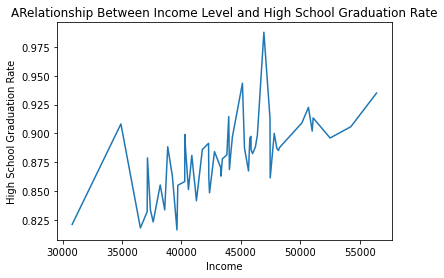

In [11]:
plt.plot(ca_only['Income'], ca_only['High_School_Grad_Rate'])
plt.xlabel("Income")  # add X-axis label
plt.ylabel("High School Graduation Rate")  # add Y-axis label
plt.title("ARelationship Between Income Level and High School Graduation Rate")  # add title

#### As you can tell, this graph isn't very easy to read and doesn't really tell us much about the relationship between income and high school graduation rate

# **Question 4b:**
#### Now we may want to see if there is a relationship between these two variables. It might be hard to see in this graphic, so next we will use Seaborn's [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to see if there is a more linear relationship. Create an lmplot based on the same data, but using an lmplot from Seborn instead of matplotlib.

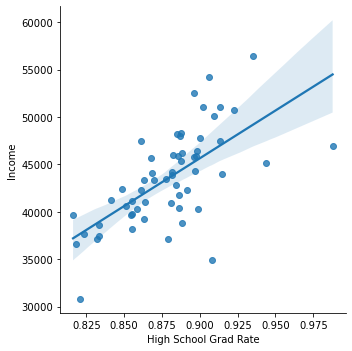

In [12]:
ax = sns.lmplot(data=ca_only, x='High_School_Grad_Rate', y='Income')
ax.set(xlabel="High School Grad Rate",
       ylabel="Income")

#### Now it is more clear the relationship between Income and High School Grad Rate! However, visualizations are not always the most reliable. At least not as much as the raw numbers. 

# **Question 4c:**
#### Find the correlation coefficient using numpy's [corrcoef](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) method.

In [13]:
x = ca_only["Income"]
y = ca_only["High_School_Grad_Rate"]
r = np.corrcoef(x, y)
r

array([[1.        , 0.65544651],
       [0.65544651, 1.        ]])

# **Regression with Scikit-Learn**
#### Scikit-Learn is an open source library used for machine learning purposes. It was built purposely for Python and is used in many other classes here at UC Berkeley. feel free to browse their [website](https://scikit-learn.org/stable/) and official [documentation](https://scikit-learn.org/stable/modules/classes.html), but don't worry too much if a lot of this is confusing or unfamiliar. We will be working with linear regression initially. Below is the linear regression equation:
$$\large Y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}...$$
#### For those of you who have taken Math 54 or a similar linear algebra class, the multiple regression equation above can be simplified into the following using matrix notation:
$$ \Large \hat{\mathbb{Y}} = \mathbb{X}\theta $$
#### Where $\hat{\mathbb{Y}}$ is a vector of all predictions found by multiplying $\mathbb{X}$, a matrix of all regressors(variables) from the data frame you want to use for the prediction and $\theta$, a vector of all their coefficients.

- $\theta_{0}$ is the intercept, or the point where the slope of the line touches the y-axis. This is similar to slope intercept form, $y=mx + b$ where b is the y-intercept.
- The other theta values ($\theta_{1}, \theta_{2},...$) are the coefficients of the regressors. These show how much Y will change with an increase of 1
- the x values ($x_{1}, x_{2}, ...$) are the actual regressors. Regressors are simply the variables you want to use to predict Y. In our case, these are the columns of the data frame. For the ca_only data frame, these are City, Name, Income, High_School_Grad_Rate, and State.

# **Question 5a:**
#### Using sklearn and their [linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), fit a linear regression to the ca_only data frame we just created earlier.

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [15]:
model.fit(X=ca_only[['High_School_Grad_Rate']], y=ca_only['Income'])

LinearRegression()

#### You may have noticed that the output is not a visualization, but rather a LinearRegression object. So how can we ensure that the model reflects what we saw using Seaborn's lmplot?

# **Question 5b:**
#### Use the intercept, coef, and predict methods found in the same [linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) documentation to get some insights on the linear regression just created.

In [16]:
model.intercept_

-45022.84581837098

In [17]:
model.coef_

array([100737.96740542])

#### Using the linear model with our data, we get the following:
$$\large Income = -45022.85 + 100737.97(gradRate)$$

#### Say we want to predict what a person's income may be based on their county's grad rate, we can use the predict method and plug in the grad rate of interest.

In [18]:
model.predict([[0.85]])

C:\Users\cschow\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40604.42647624])

#### Comparing this value to where it would be on the graph created in part 4b, we can see that this seems to be accurate! You can also check by simply plugging in the value for graduation rate and calculating income using the equation by hand or with a calculator. You'll see that it is the same.